In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset & Function to display images

In [ ]:

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


def display_mnist_images(images, labels, num_images=10):  # Add default value for num_images
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')  # Hide axes
    plt.tight_layout()
    plt.show()

# Display the first 10 images from the training set


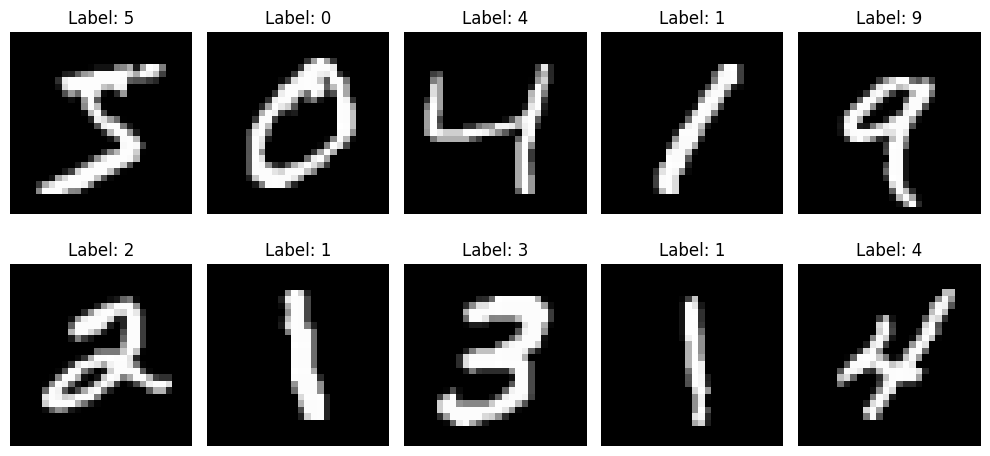

In [ ]:
display_mnist_images(train_images, train_labels, num_images=10)

# Display the first 10 images from the test set

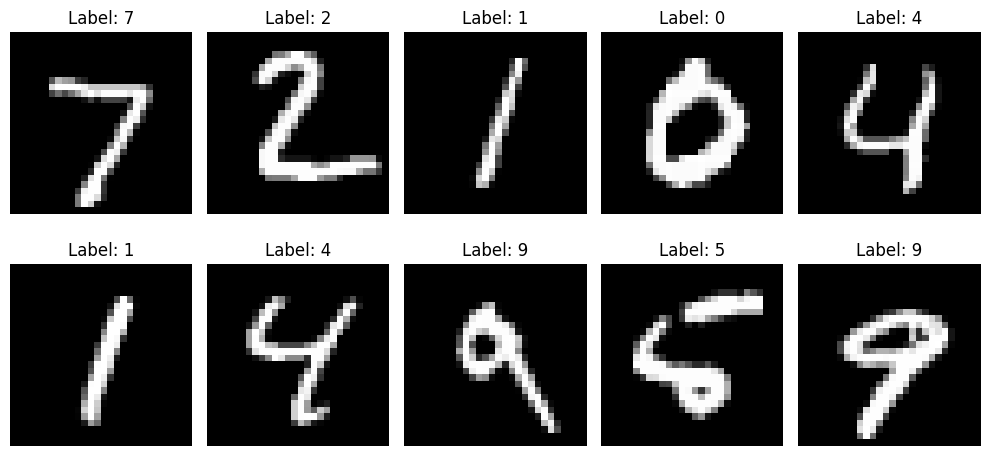

In [ ]:
display_mnist_images(test_images, test_labels, num_images=10)

# Preprocess the data

In [ ]:
train_images = train_images.reshape((60000,28,28,1)).astype('float32')/255
test_images = test_images.reshape((10000,28,28,1)).astype('float32')/255

# Convert labels to one-hot encoding

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build  the CNN models

In [ ]:
model = models.Sequential()

# First convolutional Layer

In [ ]:
model.add(layers.Conv2D(32, (3,3), activation= 'relu' , input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Second Convolutional Layer

In [ ]:
model.add(layers.Conv2D(64,(3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))

# Third Convolutional layer

In [ ]:
model.add(layers.Conv2D(64, (3,3), activation='relu'))

# Fully connected layers

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))

# Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9935 - loss: 0.0204 - val_accuracy: 0.9895 - val_loss: 0.0359
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9948 - loss: 0.0157 - val_accuracy: 0.9879 - val_loss: 0.0424
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9951 - loss: 0.0147 - val_accuracy: 0.9898 - val_loss: 0.0433
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9960 - loss: 0.0109 - val_accuracy: 0.9890 - val_loss: 0.0422
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9966 - loss: 0.0094 - val_accuracy: 0.9889 - val_loss: 0.0404
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9975 - loss: 0.0078 - val_accuracy: 0.9894 - val_loss: 0.0484
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9978 - loss: 0.0066 - val_accuracy: 0.9908 - val_loss: 0.0445
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9982 - loss: 0.0061 - val_accuracy: 0.

# Plot training & validation accuracy values

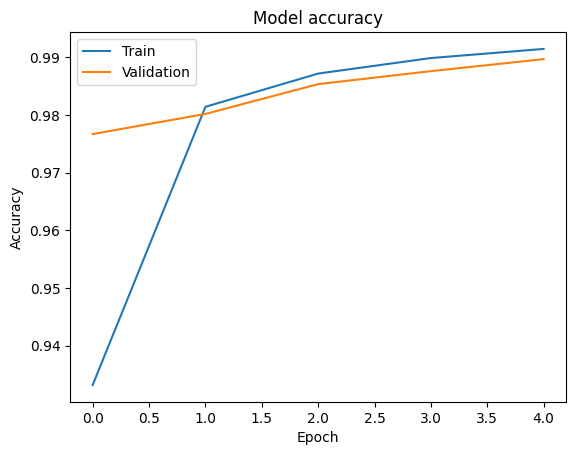

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values

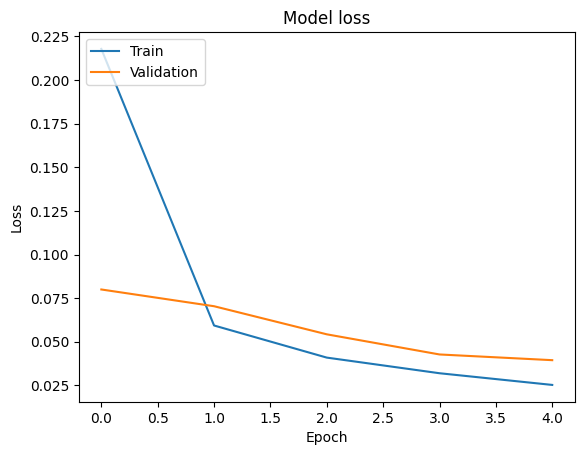

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Number of correct predictions: 9895
Number of incorrect predictions: 105


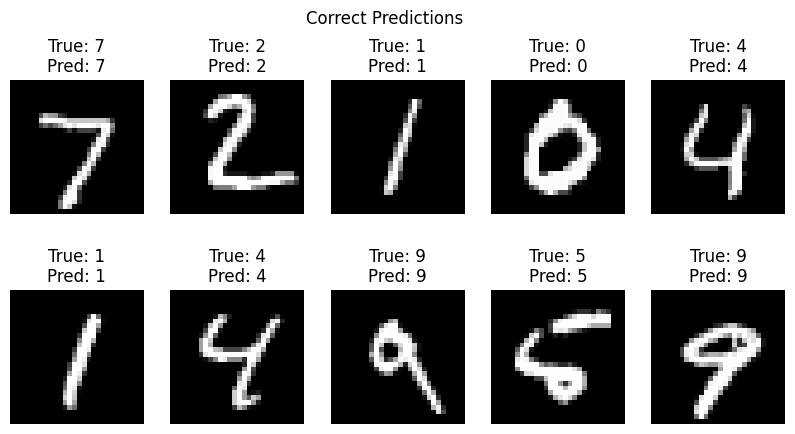

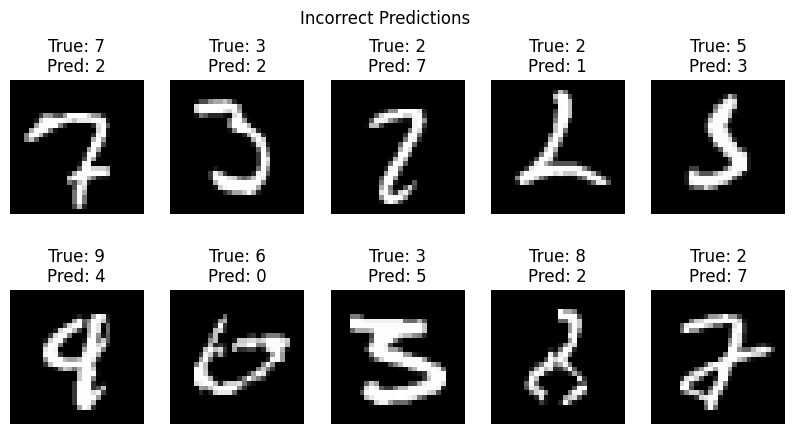

In [ ]:
import numpy as np

# Make predictions on the test set
predictions = model.predict(test_images)

# Get the predicted class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Check which predictions are correct
correct_indices = np.where(predicted_classes == true_classes)[0]
incorrect_indices = np.where(predicted_classes != true_classes)[0]

# Print the number of correct and incorrect predictions
print(f"Number of correct predictions: {len(correct_indices)}")
print(f"Number of incorrect predictions: {len(incorrect_indices)}")

# Optionally, visualize some correct and incorrect predictions
def plot_images(images, labels, predictions, indices, title):
    plt.figure(figsize=(10, 5))
    for i, index in enumerate(indices[:10]):  # Show first 10 images
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[index].reshape(28, 28), cmap='gray')
        plt.title(f"True: {labels[index]}\nPred: {predictions[index]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Plot some correct predictions
plot_images(test_images, true_classes, predicted_classes, correct_indices, "Correct Predictions")

# Plot some incorrect predictions
plot_images(test_images, true_classes, predicted_classes, incorrect_indices, "Incorrect Predictions")